# Color Discretization

### ColorDiscretizer demo

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import sys
sys.path.append("../")

In [34]:
from utils.color_discretizer import ColorDiscretizer
from utils.color_utils import YUV_to_RGB, RGB_to_YUV
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [57]:
cd = ColorDiscretizer(max_categories=32)
imdir = "../data/iccv09Data/images/"
cd.train(imdir, 30)

/Users/marc/Documents/Dropbox/Stanford/Class/3rdQuarter/CS231N/project/all-colors-matter/utils/color_discretizer.py:86: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)


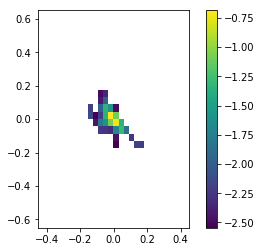

In [58]:
cd.plot_heatmap()

In [37]:
from matplotlib.pyplot import imread
from utils.color_utils import RGB_to_YUV

image = imread("../data/iccv09Data/images/0000051.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
UVpixels = np.reshape(UVimage, newshape=[-1, 2])

In [38]:
cd.categorize(UVimage)

array([[29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       [29, 29, 29, ..., 29, 29, 29],
       ...,
       [12, 12, 12, ..., 18, 18, 18],
       [12, 12, 12, ..., 18, 18, 18],
       [12, 12, 12, ..., 18, 18, 18]])

In [41]:
for i in range(cd.max_categories):
    print(i, 
          cd.indices_to_xycategories_map[i], 
          '\t', 
          cd.categories_mean_pixels[i],
          '\t',
          cd.category_frequency[i],
          '\t',
          cd.weights[i],
         )

0 (10, 15) 	 [0. 0.] 	 0.011585970097357439 	 2.6222232009813142
1 (10, 16) 	 [-0.135  0.065] 	 0.01296722878998609 	 2.447920223932191
2 (11, 14) 	 [-0.105      -0.02166667] 	 0.004083796940194714 	 4.275878334960288
3 (11, 15) 	 [-0.105       0.02166667] 	 0.0028459666203059803 	 4.772461195865025
4 (12, 13) 	 [-0.075 -0.065] 	 0.006153511821974966 	 3.642207883054742
5 (12, 14) 	 [-0.075      -0.02166667] 	 0.01655511126564673 	 2.087488912979542
6 (12, 15) 	 [-0.075       0.02166667] 	 0.006301721140472879 	 3.603962120656464
7 (12, 16) 	 [-0.075  0.065] 	 0.010702799026425592 	 2.7473020165774185
8 (12, 17) 	 [-0.075       0.10833333] 	 0.0047005389429763565 	 4.065129069336506
9 (12, 18) 	 [-0.075       0.15166667] 	 0.007833362308762167 	 3.251154672653982
10 (13, 13) 	 [-0.045 -0.065] 	 0.005596314325452017 	 3.793558260873165
11 (13, 14) 	 [-0.045      -0.02166667] 	 0.02623565716272601 	 1.49397566833718
12 (13, 15) 	 [-0.045       0.02166667] 	 0.04501521210013908 	 0.962887

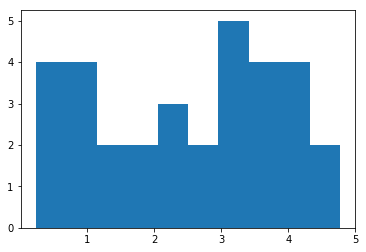

In [43]:
plt.hist(cd.weights.values())
plt.show()

In [44]:
categories_distributions = np.abs(np.random.rand(4, 4, cd.n_categories))
cd.UVpixels_from_distribution(categories_distributions)

array([[[-0.01685897, -0.00776566],
        [-0.00546058, -0.01526179],
        [-0.00839683, -0.02107398],
        [-0.01265305, -0.00270735]],

       [[-0.01125584,  0.00198392],
        [-0.01806234, -0.01452373],
        [-0.01094832, -0.00552503],
        [-0.01178982, -0.00179416]],

       [[-0.01712264, -0.00622575],
        [ 0.00029857, -0.01607478],
        [-0.01865827, -0.00398288],
        [-0.02501097,  0.00193678]],

       [[-0.01879925, -0.00618432],
        [-0.01838606,  0.00143557],
        [-0.01186706, -0.00784057],
        [-0.02030225,  0.00724604]]])

### L2 cost of categorizing

In [45]:
image = imread("../data/iccv09Data/images/0002136.jpg").astype(np.dtype("float32"))
YUVimage = RGB_to_YUV(image)
UVimage = YUVimage[:, :, 1:]
Yimage = YUVimage[:, :, :1]

In [46]:
pixels_categories = cd.categorize(UVimage)

pixel_categories_onehot = to_categorical(pixels_categories, num_classes=cd.n_categories)

reconstructed_UVimage = cd.UVpixels_from_distribution(pixel_categories_onehot)

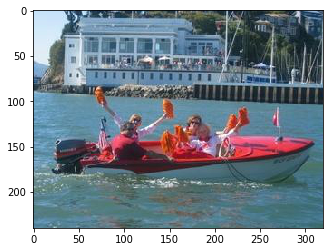

In [47]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2))/255.)
plt.show()

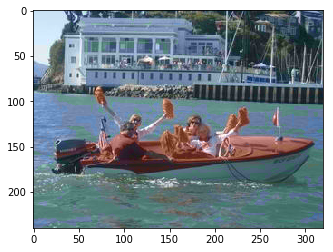

In [48]:
plt.imshow(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2)) / 255)
plt.show()

In [49]:
np.linalg.norm(reconstructed_UVimage - UVimage, axis = (0, 1)) / len(UVpixels) / np.std(UVpixels, axis = 0)

array([0.0015596 , 0.00339061])

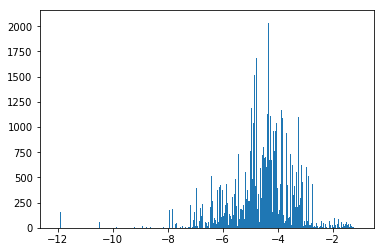

In [50]:
plt.hist(np.reshape(np.log(np.abs(reconstructed_UVimage - UVimage)), [-1, 1]), bins = 1000)
plt.show()

Note that sometimes, the return to RGB space goes over 255 or below 0, so we added a correction to the function.

In [59]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2),correction = False)))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, UVimage], axis=2),correction = False)))

255.00000000000006
-1.4155343563970746e-14


In [60]:
print(np.max(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2), correction = False)))
print(np.min(YUV_to_RGB(np.concatenate([Yimage, reconstructed_UVimage], axis=2), correction = False)))

262.7662766191968
-2.1344500351316174


### Thresholding out rare pixels

In [61]:
for threshold in [.000001, .00001, .0001, .001]:
    cd = ColorDiscretizer(threshold=threshold)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))

TypeError: 'NoneType' object cannot be interpreted as an integer

### Using a fixed number of categories

../utils/color_discretizer.py:77: RuntimeWarning: divide by zero encountered in log10
  logheatmap = np.log10(hm)


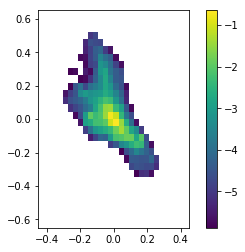

Remaining colors: 179


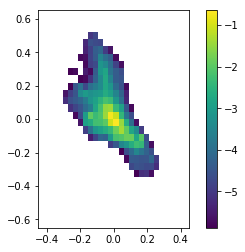

Remaining colors: 179


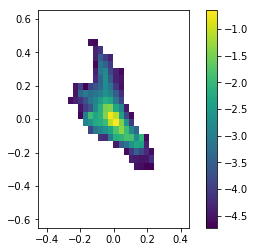

Remaining colors: 128


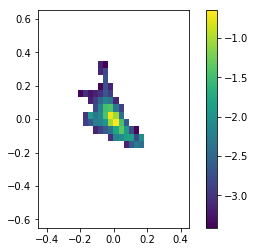

Remaining colors: 64


In [22]:
for max_cat in [250,200,128,64]:
    cd = ColorDiscretizer(threshold=.000001,max_categories=max_cat)
    imdir = "../data/iccv09Data/images/"
    cd.train(imdir, 30)
    cd.plot_heatmap()
    print("Remaining colors: {}".format(np.sum(cd.heatmap > cd.threshold)))